In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

カーネル密度関数に関する説明(滑らかなヒストグラムを生成)
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

(0, 1)

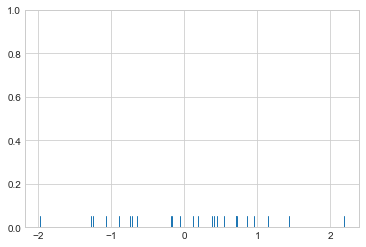

In [3]:
dataset = randn(25)
# rugplotを書きます
sns.rugplot(dataset)
plt.ylim(0,1)

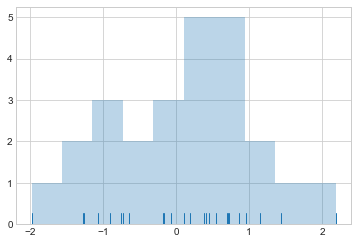

In [4]:
# ヒストグラムを重ねます。
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

バンド幅の推定

http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

(0, 1)

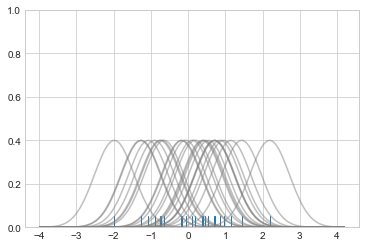

In [7]:
sns.rugplot(dataset);

# X軸を競ってい
x_min = dataset.min() - 2
x_max = dataset.max() + 2
# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min,x_max,100)

# wikipediaのコードを抜粋
# データセットの標準偏差を5乗したものを3×データセットの長さで割って全体を1/5乗するので0.2乗する
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []
# データポイントごとにカーネルを作る
for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey', alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

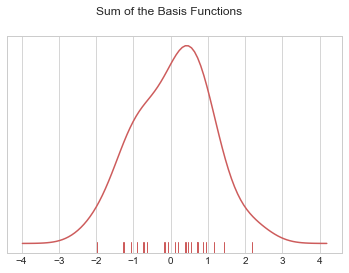

In [8]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset,c = 'indianred')
# y軸を消す
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

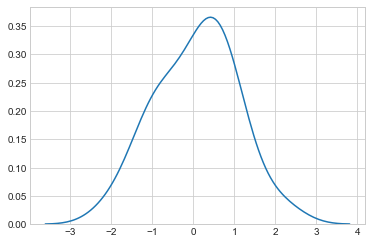

In [10]:
# これが1行で出来ます。
sns.kdeplot(dataset)

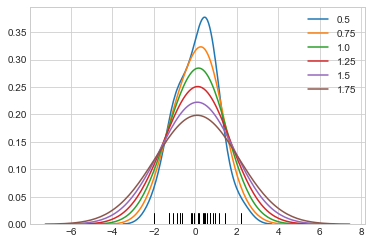

In [12]:
sns.rugplot(dataset,color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

カーネル関数の説明（英語）

http://en.wikipedia.org/wiki/Kernel_(statistics)

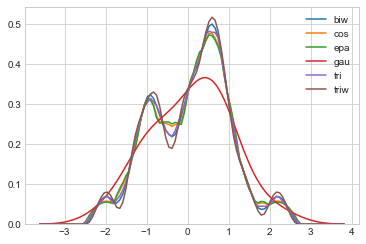

In [13]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

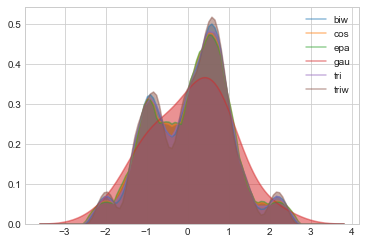

In [14]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

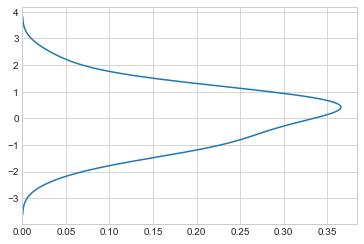

In [15]:
# 軸を入れ替えることもできます。
sns.kdeplot(dataset,vertical=True)

cumulative distribution function (CDF)

累積分布関数

http://en.wikipedia.org/wiki/Cumulative_distribution_function

(array([  1.,   3.,   6.,   8.,  11.,  16.,  21.,  23.,  24.,  25.]),
 array([-1.98075421, -1.56375877, -1.14676332, -0.72976787, -0.31277242,
         0.10422302,  0.52121847,  0.93821392,  1.35520936,  1.77220481,
         2.18920026]),
 <a list of 10 Patch objects>)

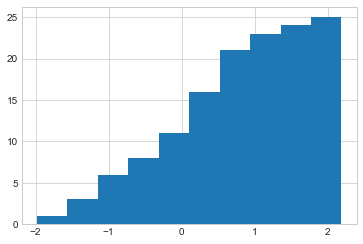

In [16]:
plt.hist(dataset, cumulative=True)

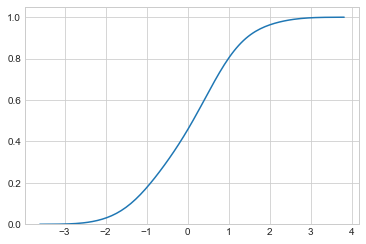

In [17]:
sns.kdeplot(dataset,cumulative=True)

In [24]:
# 2次元平面上の中心
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)

/Users/hiraku/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


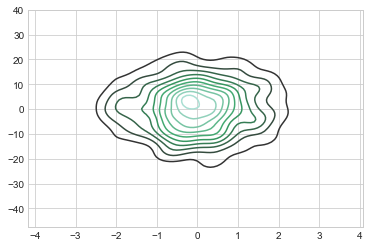

In [25]:
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)

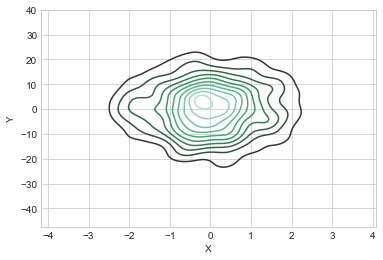

In [26]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y)

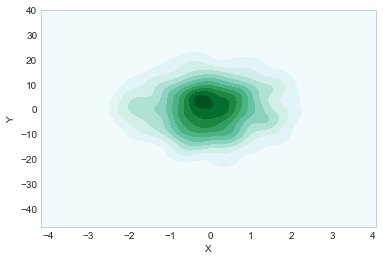

In [27]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y, shade=True)

/Users/hiraku/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


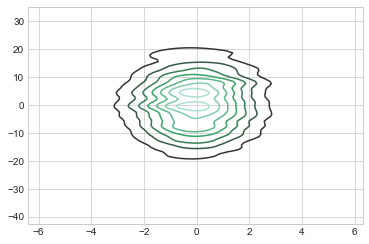

In [28]:
# バンド幅を変えられます。
sns.kdeplot(dframe,bw=1)

/Users/hiraku/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


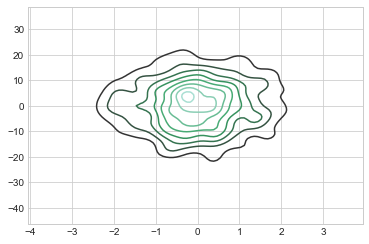

In [30]:
# 文字列でも渡せます。
sns.kdeplot(dframe,bw='silverman')

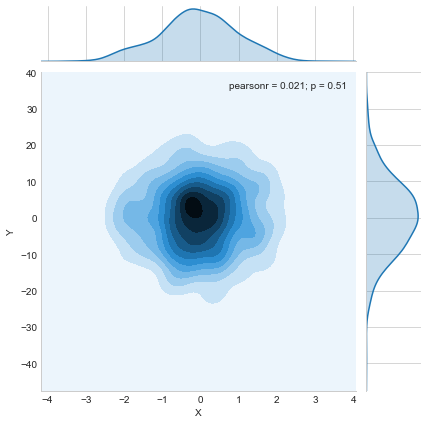

In [31]:
# 同時分布の推定も可能です。
sns.jointplot('X','Y',dframe,kind='kde')